In [1]:
#Importamos las librerias!
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from warnings import filterwarnings
filterwarnings('ignore')

# Importamos la data
df = pd.read_csv('../Datos/faithful.csv')
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


Text(0.5, 1.0, 'Visualización de datos')

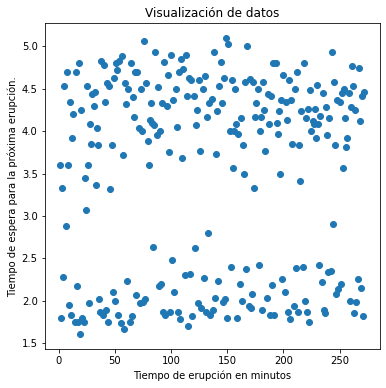

In [4]:
# Ploteamos la data!
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Tiempo de erupción en minutos')
plt.ylabel('Tiempo de espera para la próxima erupción.')
plt.title('Visualización de datos')

In [5]:
# Estandarizamos los datos!
X_std = StandardScaler().fit_transform(df)

# Recordemos... 

El método Elbow o también conocido como el método del codo, nos da una idea de cuál sería un buen número de k para nuestro clústering. Para dicha elección evaluamos cual es el valor de K donde la curva empieza a aplanarse y forma la imagen de un codo. 

Text(0, 0.5, 'Suma de la distancia al cuadrado')

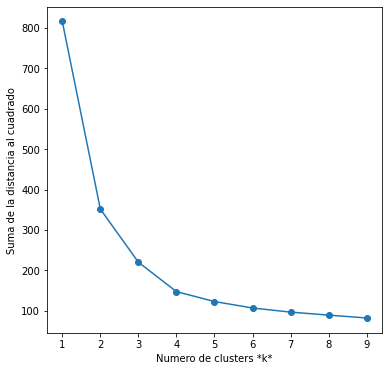

In [6]:
# Gráfiquemos
sse = [] #Suma de la distancia al cuadrado
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Numero de clusters *k*')
plt.ylabel('Suma de la distancia al cuadrado')

De la gráfica anterior podemos interpretar que un K = 2 no es una mala opción de selección.

In [7]:
#Aplicacion de Kmeans
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_std)

KMeans(n_clusters=2, random_state=42)

In [8]:
#Calculo del Índice de Silhouette
score = silhouette_score(X_std, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.526


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


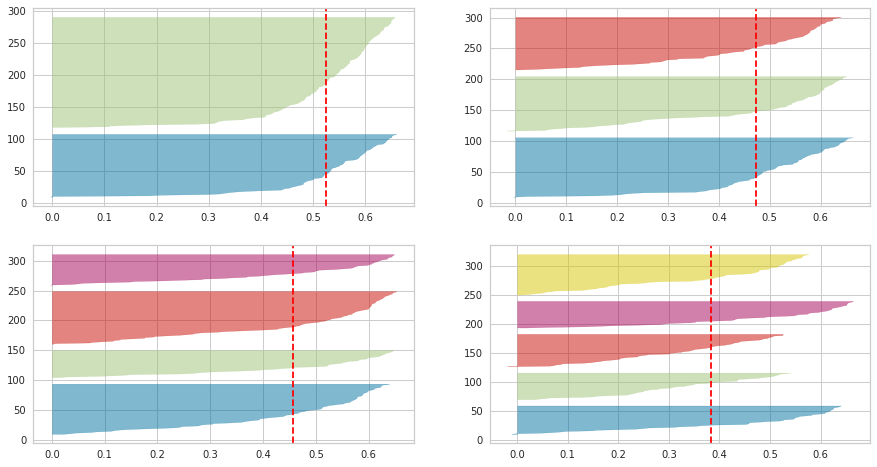

In [9]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8)) #Definimos el tamaño del gráfico
for i in [2, 3, 4,5]:
    
    #Creando diferentes instancias de kmeans para distinta cantidad de cluster
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    #Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_std)

**Insight**

k = 2 es el valor más óptimo a elegir, dado que a mayor número de k el índice de Silhouette disminuye.